# Chapter 21: Ordering and Sorting of Stream Elements|

Inside a stream, each object has a position and thus an **order** in the Stream

In [1]:
from music21 import *

Let’s take a simple Stream

In [2]:
# insert three elements that take up no space (a TimeSignature, KeySignature, and a Clef)
s = stream.Measure()
ts1 = meter.TimeSignature('3/4')
s.insert(0, ts1)
s.insert(0, key.KeySignature(2))
s.insert(0, clef.TrebleClef())
s.insert(0, note.Note('C#4'))
s.insert(1, note.Note('D#4'))

we can append an element to the end of the Stream

In [4]:
e = note.Note('E4')
s.append(e)
s.show('xml')

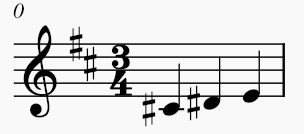

In [5]:
# the C# will be the fourth element in the Stream
s[3]

<music21.note.Note C#>

In [6]:
s[4]

<music21.note.Note D#>

In [7]:
s[-1]

<music21.note.Note E>

In [8]:
e.offset
# e.getOffsetBySite(s) is a safer way
# s.elementOffset(e) is faster

2.0

find all the elements at a particular offset

In [9]:
# use the square bracket index to reference it
s.getElementsByOffset(2.0)[0]

<music21.note.Note E>

In [10]:
#  get multiple elements back with an offset range
y = s.getElementsByOffset(1.0, 3.0)
(y[0], y[1])

(<music21.note.Note D#>, <music21.note.Note E>)

Let’s show the Stream as a text file

In [11]:
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{2.0} <music21.note.Note E>


In [12]:
# the TrebleClef object which was inserted third has now become the first element of the Stream
# The KeySignature and TimeSignature objects have also switched position

# That's what we expect to see
(s[0], s[1], s[2])

(<music21.clef.TrebleClef>,
 <music21.key.KeySignature of 2 sharps>,
 <music21.meter.TimeSignature 3/4>)

 each of these objects knows its place in the Stream, because of ***.classSortOrder***

In [13]:
(s[0].classSortOrder, s[1].classSortOrder, s[2].classSortOrder)

(0, 2, 4)

In [14]:
# Notes have a higher classSortOrder
(note.Note.classSortOrder, base.Music21Object.classSortOrder)

(20, 20)

In [15]:
# There are a few elements that sort even lower than Clefs
(bar.Barline.classSortOrder, instrument.Instrument.classSortOrder, metadata.Metadata.classSortOrder)

(-5, -25, -30)

If we put a second TimeSignature into the stream at offset 0

In [16]:
ts2 = meter.TimeSignature('6/8')
s.insert(0, ts2)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{2.0} <music21.note.Note E>


Let us insert two more notes into the stream

In [17]:
# but we’ll make the note at offset 1 come before the D# and the one at offset 2 come after the E
# Every Music21Object has a priority attribute, and the default is 0
d = note.Note('D')
d.priority = -10
eis = note.Note('E#')
eis.priority = 10
s.insert(1.0, d)
s.insert(2.0, eis)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D>
{1.0} <music21.note.Note D#>
{2.0} <music21.note.Note E>
{2.0} <music21.note.Note E#>
